In [75]:
library(viridis)

Loading required package: viridisLite


In [76]:
site<-'NZSIBT'
LT50<-33.3

In [77]:
basefolder <- paste("../processedoutput/", site, "/", sep="")
mtfiles<-list.files(basefolder)

In [103]:
for(a in 1:length(mtfiles)){
    height<-substr(mtfiles[a], 16, 18)
    print(paste(height, 'cm'))
    
    data<-read.table(paste(basefolder, mtfiles[a], sep=""), header=TRUE)
    data$year<-substr(data$Date, 1, 4)
    data<-subset(data, data$year>=1997)
    data$yearmonth<-substr(data$Date, 1, 7)
    
    Tmax<-aggregate(data$Temp, list(data$yearmonth), max)
    colnames(Tmax)<-c('yearmonth', 'Tmax')
    
    LTtimes<-subset(data, data$Temp>=LT50)
    
    if(nrow(LTtimes)>0){
        LTDate <- aggregate(LTtimes$Temp, list(LTtimes$Date), NROW)
        colnames(LTDate)<-c('Date', 'MinsLT')
        LTDate$MinsLT <- LTDate$MinsLT*30
        LTDate$HoursLT <- LTDate$MinsLT/60
        LTDate$yearmonth<-substr(LTDate$Date, 1, 7)
        AboveLT <- aggregate(LTDate$HoursLT, list(LTDate$yearmonth), max)
        colnames(AboveLT) <- c("yearmonth", 'TimeTotal')

        allmonths<-merge(Tmax, AboveLT, all=TRUE)
        Tmax <- allmonths[,c('yearmonth', 'Tmax')]
        AboveLT <- allmonths[,c('yearmonth', 'TimeTotal')]

        colnames(Tmax)[2]<-height
        colnames(AboveLT)[2]<-height
    
    }else{
        
        AboveLT <- Tmax
        AboveLT$Tmax<- rep(NA)
        
        colnames(Tmax)[2]<-height
        colnames(AboveLT)[2]<-height
        
    }
    
    if(a==1){
        MaxTemp <- Tmax        
        MaxTime <- AboveLT
        
    }else{
        
        MaxTemp[,(a+1)] <- Tmax[,2]
        MaxTime[,(a+1)] <- AboveLT[,2]
        
    }
    
    colnames(MaxTemp)[a+1] <- height
    colnames(MaxTime)[a+1] <- height
    
}

[1] "050 cm"
[1] "060 cm"
[1] "070 cm"
[1] "080 cm"
[1] "090 cm"
[1] "100 cm"
[1] "110 cm"
[1] "120 cm"
[1] "130 cm"
[1] "140 cm"
[1] "150 cm"
[1] "160 cm"
[1] "170 cm"
[1] "180 cm"
[1] "190 cm"
[1] "200 cm"
[1] "210 cm"
[1] "220 cm"
[1] "230 cm"
[1] "240 cm"
[1] "250 cm"


In [104]:
#MaxTime[is.na(MaxTime)] <- 0
rownames(MaxTime)<-MaxTime[,1]
MaxTime<-MaxTime[,-1]

In [105]:
head(MaxTime)

,050,060,070,080,090,100,110,120,130,140,⋯,160,170,180,190,200,210,220,230,240,250
1997-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1997-02,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,0.5,0.5,0.5,0.5,0.5
1997-03,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1997-04,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1997-05,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1997-06,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


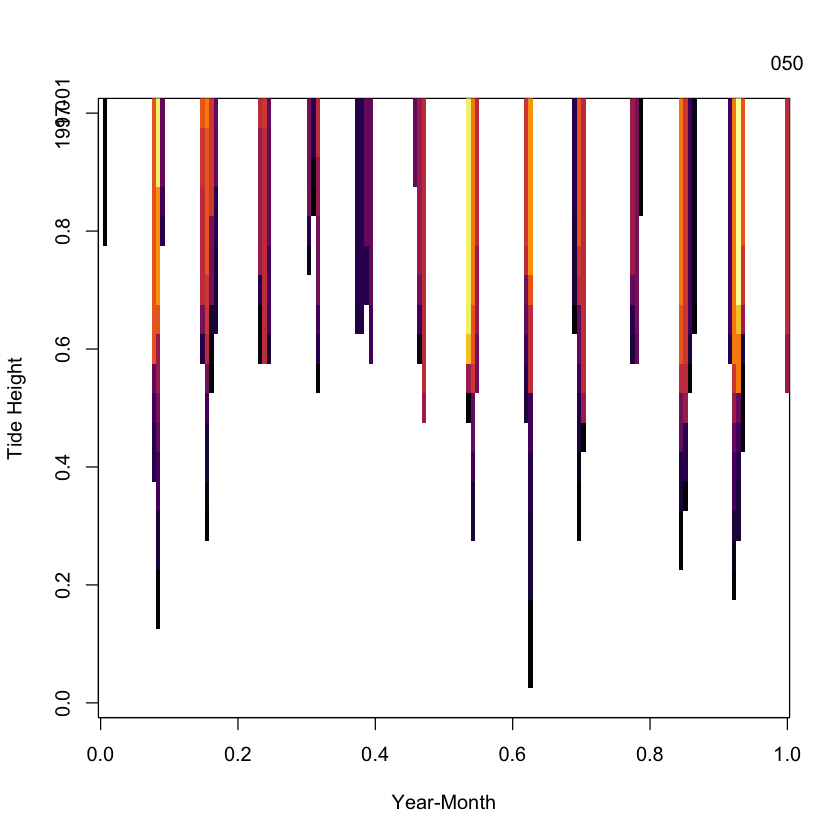

In [106]:
image(as.matrix(MaxTime), col=inferno(25), axes=TRUE, ylab='Tide Height', xlab="Year-Month")
axis(3, at = 1:ncol(MaxTime), labels=colnames(MaxTime),srt=45,tick=FALSE)
axis(2, at = 1:nrow(MaxTime), labels=rownames(MaxTime),srt=45,tick=FALSE)

In [96]:
source('filled.contour/filled.contour.R', chdir = TRUE)
source('filled.contour/filled.legend.R', chdir = TRUE)

In [84]:
par(plt = c(0.2,0.95,0.60,0.95), #c(left, right, bottom, top)  
    las = 1,                      # orientation of axis labels
    cex.axis = 1,                 # size of axis annotation
    tck = -0.04,
    xaxs="i",
    yaxs="i")




ERROR: Error in filled.contour3(y = as.numeric(colnames(MaxTime)), z = MaxTime): no proper 'z' matrix specified


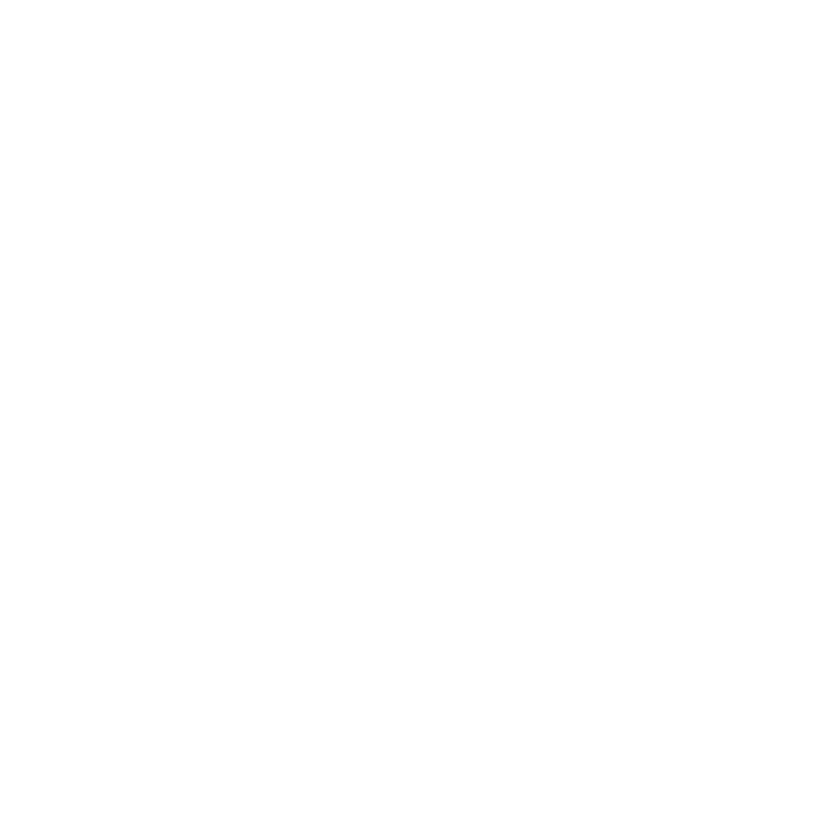

In [98]:
filled.contour3(x=rownames(MaxTime), y=as.numeric(colnames(MaxTime)), z=MaxTime)

In [100]:
as.numeric(rownames(MaxTime))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [51] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [76] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[101] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[126] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[151] NA NA NA NA NA NA